In [22]:
import numpy as np

from itkwidgets import view
import matplotlib.pyplot as plt

import site
site.addsitedir("../src")

from mocoreg import mocoreg

In [23]:
app = mocoreg(smooth_registrations=True, debug=False)
app.read_4d_bmode_matlab_file('../Data/bmenvRyanNonPermuted_2.dat', nframes=200, nlateral=102, nelevation=102, ndepth=92)

smooth_registrations True
feature_size 0.75
multi_frame_smoothing_window_size 2
keyframe_transform_smoothing_window_size 3
max_keyframe_interval 33
keyframe_search_stepsize 2


In [24]:
app.compute_keyframes()

In [25]:
print(app.keyframes)

[0, 12, 24, 34, 44, 54, 64, 76, 88, 100, 112, 126, 140, 156, 176, 199]


In [26]:
import time
start_time = time.perf_counter()
app.register_keyframes(app.keyframes)
end_time = time.perf_counter()

print("Time required for registration (seconds) = ", end_time-start_time)

Registering set 1 of 15: Frame = 12
Registering set 2 of 15: Frame = 24
Registering set 3 of 15: Frame = 34
Registering set 4 of 15: Frame = 44
Registering set 5 of 15: Frame = 54
Registering set 6 of 15: Frame = 64
Registering set 7 of 15: Frame = 76
Registering set 8 of 15: Frame = 88
Registering set 9 of 15: Frame = 100
Registering set 10 of 15: Frame = 112
Registering set 11 of 15: Frame = 126
Registering set 12 of 15: Frame = 140
Registering set 13 of 15: Frame = 156
Registering set 14 of 15: Frame = 176
Registering set 15 of 15: Frame = 199
Done!
Time required for registration (seconds) =  164.46459499999992


In [27]:
app.interpolate_keyframe_transforms()
print(app.keyframe_transforms[0])
print(app.transforms[1])

0 0.8824969025845955
0 1.0
0 0.8824969025845955
0 0.6065306597126334
0 0.32465246735834974
1 0.6065306597126334
1 0.8824969025845955
1 1.0
1 0.8824969025845955
1 0.6065306597126334
1 0.32465246735834974
2 0.32465246735834974
2 0.6065306597126334
2 0.8824969025845955
2 1.0
2 0.8824969025845955
2 0.6065306597126334
2 0.32465246735834974
3 0.32465246735834974
3 0.6065306597126334
3 0.8824969025845955
3 1.0
3 0.8824969025845955
3 0.6065306597126334
3 0.32465246735834974
4 0.32465246735834974
4 0.6065306597126334
4 0.8824969025845955
4 1.0
4 0.8824969025845955
4 0.6065306597126334
4 0.32465246735834974
5 0.32465246735834974
5 0.6065306597126334
5 0.8824969025845955
5 1.0
5 0.8824969025845955
5 0.6065306597126334
5 0.32465246735834974
6 0.32465246735834974
6 0.6065306597126334
6 0.8824969025845955
6 1.0
6 0.8824969025845955
6 0.6065306597126334
6 0.32465246735834974
7 0.32465246735834974
7 0.6065306597126334
7 0.8824969025845955
7 1.0
7 0.8824969025845955
7 0.6065306597126334
7 0.32465246735

In [28]:
app.apply_transforms()

In [29]:
tmp = [ list(app.transforms[x].GetParameters()) for x in range(len(app.transforms))]
#tmp = np.array(tmp)
#tmp = np.where(tmp>1,1,tmp)
print(len(tmp), len(app.data_array))
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])

200 200


In [30]:
print(tmp[2])
print(app.smooth_keyframe_transform_parameters(1)[0])

[9.675697584762353e-05, -0.00010708465615825866, -1.371362027591781e-05, 0.012384891077789903, 0.0027774593307926, -0.00985980265566645, 0.9999970165573264, 0.9999548532149857, 0.9999560312349738, 9.538135128464662e-05, -7.479569382459608e-07, -2.12211077332813e-05]
1 0.6065306597126334
1 0.8824969025845955
1 1.0
1 0.8824969025845955
1 0.6065306597126334
1 0.32465246735834974
0.0006252439457641935


In [31]:
from matplotlib import pyplot as plt

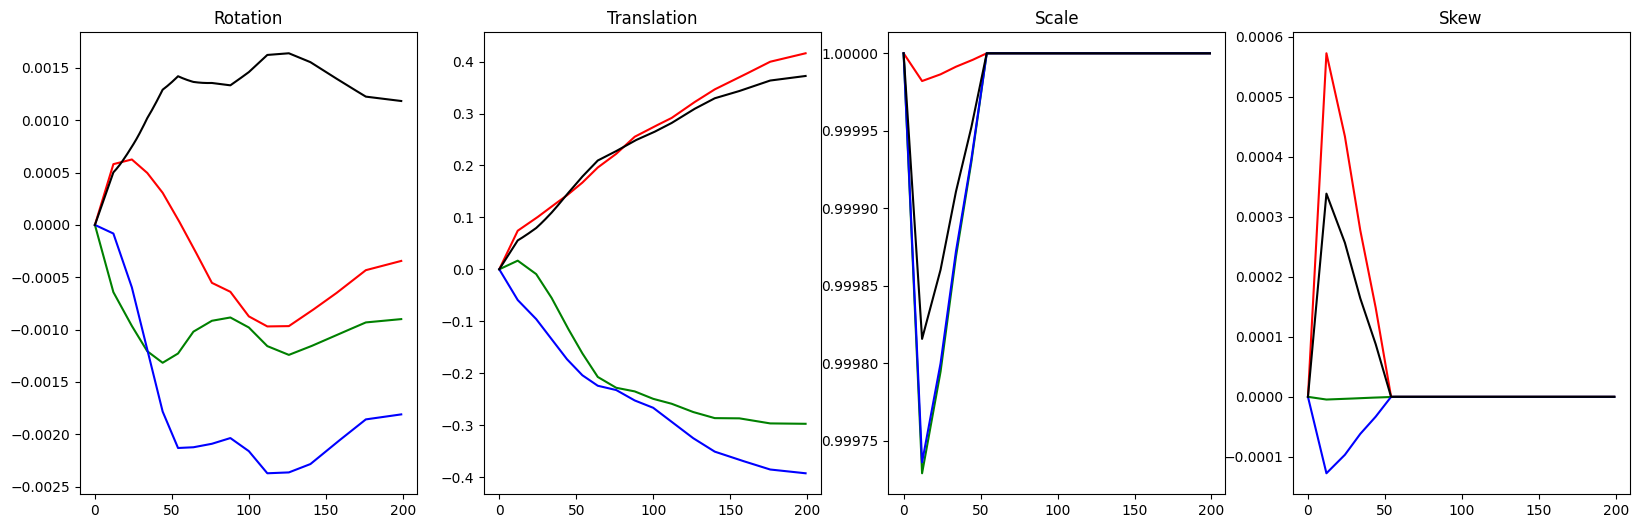

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
rlim = plt.gca().get_ylim()
plt.title("Rotation")
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
tlim = plt.gca().get_ylim()
plt.title("Translation")
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
slim = plt.gca().get_ylim()
plt.title("Scale")
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
klim = plt.gca().get_ylim()
plt.title("Skew");

In [33]:
import itk

yOrg = app.data_array[:,50,:,:].astype(np.float32)
yReg = app.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yOrg), "org.mha")
itk.imwrite(itk.GetImageFromArray(yReg), "reg.mha")
app.save_transforms("test.tfm")
app.save_matrix_transforms("test_matrix.tfm")

In [34]:
meansq, diffs = app.compute_inter_keyframe_diffs()
meansq_reg, diffs_reg = app.compute_inter_keyframe_diffs(data_array=app.data_array_reg)

In [35]:
print( np.sum(np.abs(app.data_array[0] - app.data_array[10])))
print( np.sum(np.abs(app.data_array_reg[0] - app.data_array_reg[10])))

10068802794.36934
10074434685.048088


In [36]:
app2 = mocoreg(smooth_registrations=True)
app2.data_array = app.data_array_reg
app2.compute_keyframes()
print("Using new frames =", app2.keyframes)
start_time2 = time.perf_counter()
app2.register_keyframes()  # app.keyframes)
end_time2 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time2-start_time2)

smooth_registrations True
feature_size 0.75
multi_frame_smoothing_window_size 2
keyframe_transform_smoothing_window_size 3
max_keyframe_interval 33
keyframe_search_stepsize 2
Using new frames = [0, 6, 12, 18, 24, 30, 36, 42, 50, 58, 68, 78, 90, 104, 120, 138, 158, 184, 199]
Registering set 1 of 18: Frame = 6
Registering set 2 of 18: Frame = 12
Registering set 3 of 18: Frame = 18
Registering set 4 of 18: Frame = 24
Registering set 5 of 18: Frame = 30
Registering set 6 of 18: Frame = 36
Registering set 7 of 18: Frame = 42
Registering set 8 of 18: Frame = 50
Registering set 9 of 18: Frame = 58
Registering set 10 of 18: Frame = 68
Registering set 11 of 18: Frame = 78
Registering set 12 of 18: Frame = 90
Registering set 13 of 18: Frame = 104
Registering set 14 of 18: Frame = 120
Registering set 15 of 18: Frame = 138
Registering set 16 of 18: Frame = 158
Registering set 17 of 18: Frame = 184
Registering set 18 of 18: Frame = 199
Done!
Time required for registration (seconds) =  267.516967900

0 0.8824969025845955
0 1.0
0 0.8824969025845955
0 0.6065306597126334
0 0.32465246735834974
1 0.6065306597126334
1 0.8824969025845955
1 1.0
1 0.8824969025845955
1 0.6065306597126334
1 0.32465246735834974
2 0.32465246735834974
2 0.6065306597126334
2 0.8824969025845955
2 1.0
2 0.8824969025845955
2 0.6065306597126334
2 0.32465246735834974
3 0.32465246735834974
3 0.6065306597126334
3 0.8824969025845955
3 1.0
3 0.8824969025845955
3 0.6065306597126334
3 0.32465246735834974
4 0.32465246735834974
4 0.6065306597126334
4 0.8824969025845955
4 1.0
4 0.8824969025845955
4 0.6065306597126334
4 0.32465246735834974
5 0.32465246735834974
5 0.6065306597126334
5 0.8824969025845955
5 1.0
5 0.8824969025845955
5 0.6065306597126334
5 0.32465246735834974
6 0.32465246735834974
6 0.6065306597126334
6 0.8824969025845955
6 1.0
6 0.8824969025845955
6 0.6065306597126334
6 0.32465246735834974
7 0.32465246735834974
7 0.6065306597126334
7 0.8824969025845955
7 1.0
7 0.8824969025845955
7 0.6065306597126334
7 0.32465246735

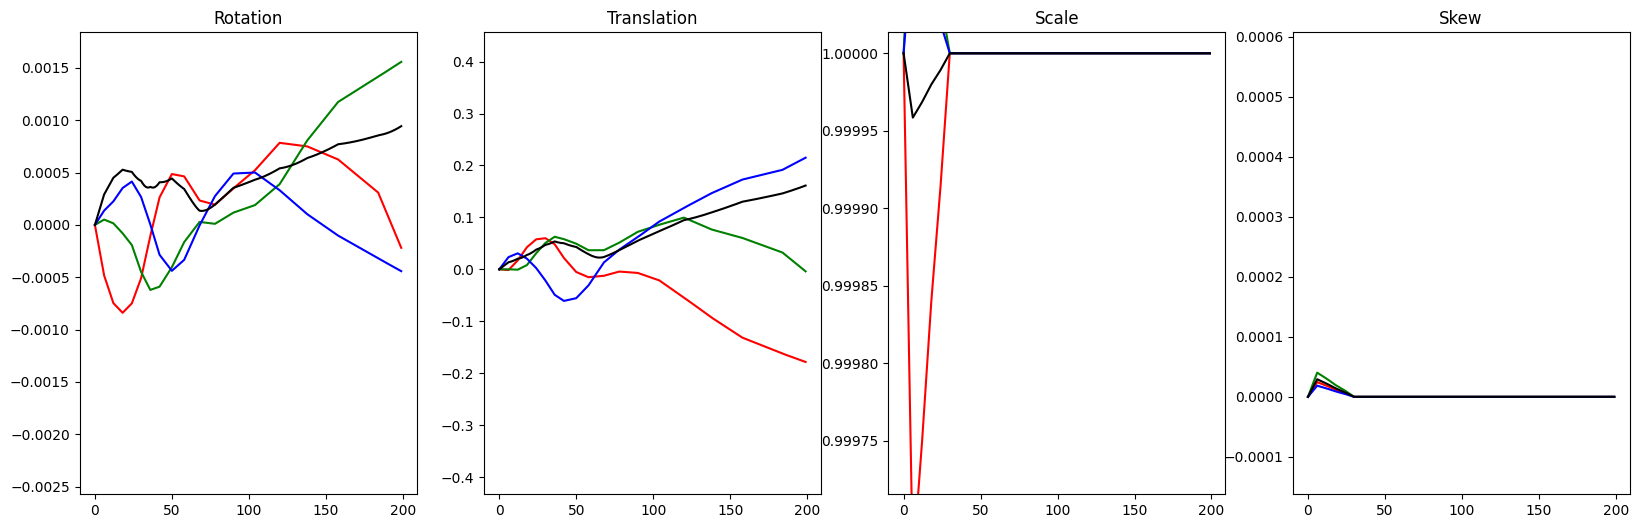

In [37]:
app2.interpolate_keyframe_transforms()
app2.apply_transforms()
tmp = [ list(app2.transforms[x].GetParameters()) for x in range(len(app2.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);

In [38]:
yRegReg = app2.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yRegReg), "regreg.mha")
app2.save_matrix_transforms("test2_matrix.tfm")

In [39]:
app3 = mocoreg(smooth_registrations=True)
app3.data_array = app2.data_array_reg
app3.compute_keyframes()
print("Using new frames =", app3.keyframes)
start_time3 = time.perf_counter()
app3.register_keyframes()  # app.keyframes)
end_time3 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time3-start_time3)

smooth_registrations True
feature_size 0.75
multi_frame_smoothing_window_size 2
keyframe_transform_smoothing_window_size 3
max_keyframe_interval 33
keyframe_search_stepsize 2
Using new frames = [0, 4, 8, 12, 16, 20, 24, 28, 34, 40, 46, 54, 62, 72, 84, 96, 110, 126, 144, 166, 198, 199]
Registering set 1 of 21: Frame = 4
Registering set 2 of 21: Frame = 8
Registering set 3 of 21: Frame = 12
Registering set 4 of 21: Frame = 16
Registering set 5 of 21: Frame = 20
Registering set 6 of 21: Frame = 24
Registering set 7 of 21: Frame = 28
Registering set 8 of 21: Frame = 34
Registering set 9 of 21: Frame = 40
Registering set 10 of 21: Frame = 46
Registering set 11 of 21: Frame = 54
Registering set 12 of 21: Frame = 62
Registering set 13 of 21: Frame = 72
Registering set 14 of 21: Frame = 84
Registering set 15 of 21: Frame = 96
Registering set 16 of 21: Frame = 110
Registering set 17 of 21: Frame = 126
Registering set 18 of 21: Frame = 144
Registering set 19 of 21: Frame = 166
Registering set 20

0 0.8824969025845955
0 1.0
0 0.8824969025845955
0 0.6065306597126334
0 0.32465246735834974
1 0.6065306597126334
1 0.8824969025845955
1 1.0
1 0.8824969025845955
1 0.6065306597126334
1 0.32465246735834974
2 0.32465246735834974
2 0.6065306597126334
2 0.8824969025845955
2 1.0
2 0.8824969025845955
2 0.6065306597126334
2 0.32465246735834974
3 0.32465246735834974
3 0.6065306597126334
3 0.8824969025845955
3 1.0
3 0.8824969025845955
3 0.6065306597126334
3 0.32465246735834974
4 0.32465246735834974
4 0.6065306597126334
4 0.8824969025845955
4 1.0
4 0.8824969025845955
4 0.6065306597126334
4 0.32465246735834974
5 0.32465246735834974
5 0.6065306597126334
5 0.8824969025845955
5 1.0
5 0.8824969025845955
5 0.6065306597126334
5 0.32465246735834974
6 0.32465246735834974
6 0.6065306597126334
6 0.8824969025845955
6 1.0
6 0.8824969025845955
6 0.6065306597126334
6 0.32465246735834974
7 0.32465246735834974
7 0.6065306597126334
7 0.8824969025845955
7 1.0
7 0.8824969025845955
7 0.6065306597126334
7 0.32465246735

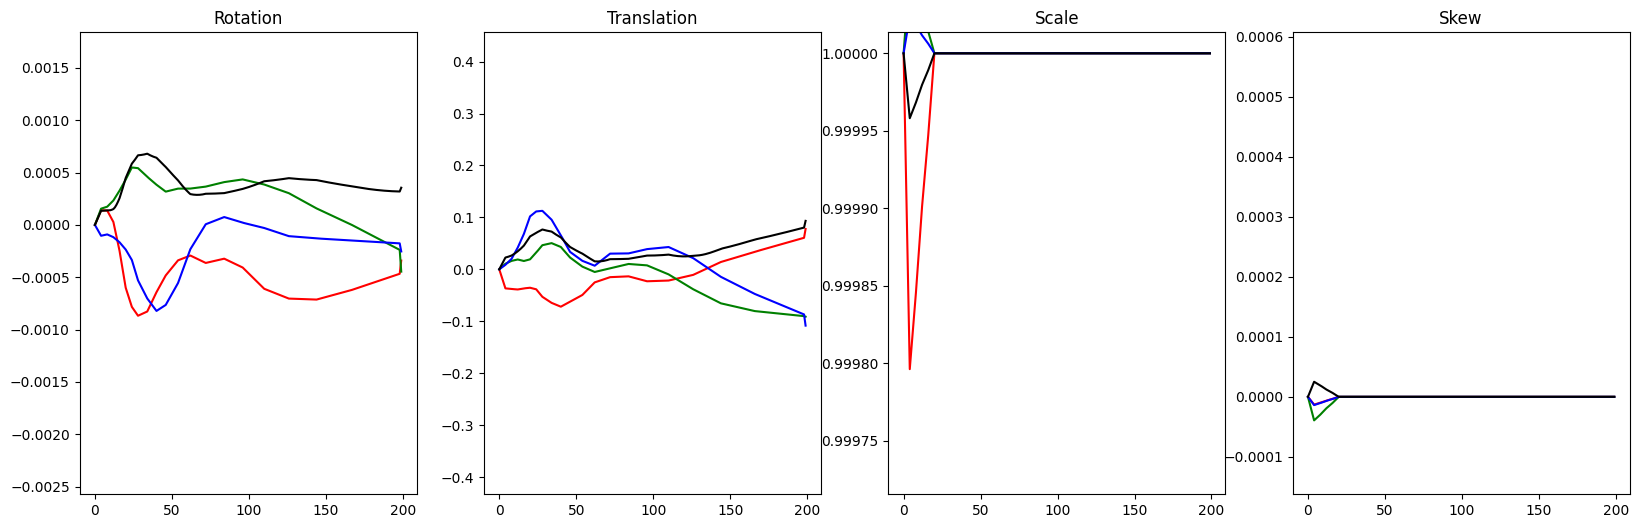

In [40]:
app3.interpolate_keyframe_transforms()
app3.apply_transforms()
tmp = [ list(app3.transforms[x].GetParameters()) for x in range(len(app3.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);

In [41]:
yRegRegReg = app3.data_array_reg[:,50,:,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yRegRegReg), "regregreg.mha")
app3.save_matrix_transforms("test3_matrix.tfm")